In [1]:
import pickle
import numpy as np
from tensorflow import keras
from tensorflow.keras import  layers
import matplotlib.pyplot as plt

C:\Users\CATIGBIANORPHANAGE\anaconda3\envs\tensdorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\CATIGBIANORPHANAGE\anaconda3\envs\tensdorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\CATIGBIANORPHANAGE\anaconda3\envs\tensdorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\CATIGBI

In [2]:
pickle_in = open("X_train1.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train1.pickle","rb")
y_train = pickle.load(pickle_in)

In [3]:
input_shape = X_train.shape[1:]
class_num = 2
print(y_train[:6])

[0, 0, 1, 1, 1, 1]


In [4]:
modelForgery = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(class_num, activation="softmax")
    ]
)

modelForgery.load_weights('myModelWeights.h5')
modelForgery.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
____

In [5]:
pickle_in = open("Xtrain.pickle","rb")
X_train1 = pickle.load(pickle_in)

pickle_in = open("ytrain.pickle","rb")
y_train1 = pickle.load(pickle_in)

input_shapes = X_train1.shape[1:]
classes = 3


In [6]:
modelAuthor = keras.Sequential(
    [
       keras.Input(shape=input_shapes),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(classes, activation="softmax")
    ]
)

modelAuthor.load_weights('myModelWeights2.h5')
modelAuthor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 32)       

In [7]:
import cv2
import os
from tqdm import tqdm

In [9]:
def extract_signature(source_image):

	# read the input image
	img = source_image
	img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]  # ensure binary
	return img

In [10]:
DATADIR = "C:/sample"

In [11]:
img_size = 200
new_img_array = []

for image in os.listdir(DATADIR):
    img_array = cv2.imread(os.path.join(DATADIR, image), cv2.IMREAD_GRAYSCALE)
    kernel = np.ones((3, 3), np.uint8)
    imgMorph = cv2.erode(img_array, kernel, iterations = 10)
    
    hello = extract_signature(imgMorph)
    hello_resize = cv2.resize(hello, (img_size, img_size))
    new_img_array.append(hello_resize)

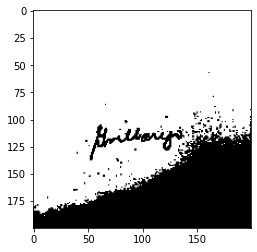

In [12]:
plt.imshow(new_img_array[9], cmap="gray")
plt.show()

In [13]:
img_arr = np.array(new_img_array).reshape(-1, img_size, img_size, 1)
img_arr = img_arr/255
img_shape = img_arr.shape[1:]

In [31]:
# print(np.array([img_arr[3]]))
preds = modelForgery.predict(np.array([img_arr[1]]))

original [0.99988437]


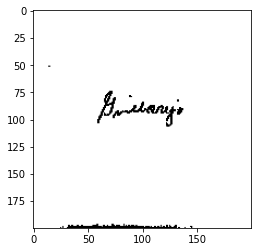

In [32]:
plt.imshow(img_arr[1], cmap="gray")
result = np.argmax(preds, axis = 1)
result1 = np.max(preds, axis = 1)
if result == 0:
    print("forged", result1)
else:
    print("original", result1)
plt.show()

Dennis [0.99857724]


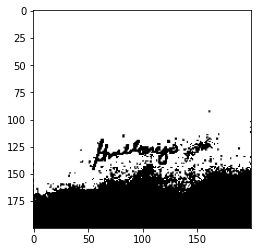

In [30]:
if result == 1:
    preds1 = modelAuthor.predict(np.array([img_arr[12]]))
    plt.imshow(img_arr[11], cmap="gray")
    result2 = np.argmax(preds1, axis = 1)
    result1 = np.max(preds1, axis=1)
    if result2 == 0:
        print("Dennis", result1)
    elif result2 == 1:
        print("Dianne", result1)
    else:
        print("Glaiza", result1)
    
    plt.show()
else:
    print("nothing to show!")